# Assignment 2: DM for Networks
Exercise 3

authors:

Lynda Attouche ~  Lenny Klump

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()
import sklearn
import random
import networkx as nx
import random
import string

## Some tests of networkx

In [2]:
G1 = nx.Graph()
G2 = nx.Graph()
G1.add_edge(0,2,weight=2)
G1.add_edge(2,4,weight=1)
G1.add_edge(8,6,weight=3)
G1.add_edge(1,2,weight=5)

G2.add_edge(0,3,weight=2)
G2.add_edge(2,3,weight=2)
G2.add_edge(4,2,weight=4)
G2.add_edge(5,3,weight=0)


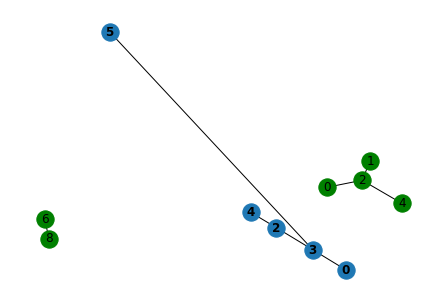

In [3]:
nx.draw(G2, with_labels=True, font_weight='bold')
nx.draw(G1, with_labels=True,node_color='g')

## Implementing edit distance

In [4]:
def editDistance(G1,G2):
  seen = []
  d = 0.0
  nodes2 = list(G2.nodes())
  nodes1 = list(G1.nodes())
  gsuper = nx.empty_graph()
  tmp = []
  #test if the graphs are isomorphic, if so, the distance = 0
  if nx.is_isomorphic(G1,G2):
    return 0.0

  #loop until visiting all nodes in G2
  while not (set(seen).issubset(list(G2.nodes())) and  len(seen)==len(list(G2.nodes()))):
    #building sub graph (sequence of operations)
    gtmp = G1.copy()

    #adding node
    #add random node from G2 if possible
    n2 = random.choice(nodes2)
    seen.append(n2)
    #if the subgraph contains the node, we do not add it otherwise we do
    if not(gtmp.has_node(n2)):
      gtmp.add_node(n2)

        
    #deleting nodes
    #delete node randomly if possible
    n1 = random.choice(nodes1)
    #check if the node is not in G2 otherwise we do not delete, and check if it is in G1 so we can delete
    if not(G2.has_node(n1)) and (gtmp.has_node(n1)):
      gtmp.remove_node(n1)


    #adding edge:
    #for each node of the subgraph
    for n in gtmp.nodes():
      #for each neighbor of this node
      for neighb in gtmp.nodes():
        #if there is an edge between the 2 in G2 and not in gtmp, we add it
        if (G2.has_edge(n,neighb)) and not(gtmp.has_edge(n,neighb)):
          gtmp.add_edge(n,neighb)
          break
            

    #removingedge:
    #for each node in subgraph
    for n in gtmp.nodes():
      #for each negihbor
      for neighb in gtmp.nodes():
        #if there isn't an edge between them in G2 but there is one in the subgraph, we remove it
        if not(G2.has_edge(n,neighb)) and (gtmp.has_edge(n,neighb)):
          gtmp.remove_edge(n,neighb)
          break

    #print(len(gtmp))
    #add each subgraph to tmp
    tmp.append(gtmp)

  #we add the subgraph as a subgraph of the super graph (as a node)
  for sub in tmp:
      gsuper.add_edges_from(sub.edges())
      gsuper.add_nodes_from(sub.nodes())

  #compute optimal path with dijkstra
  idx= 0
  idx = nx.dijkstra_path(gsuper,0,len(gsuper.edges())+1)
  d = len(idx)

  return d,gsuper

## Tests of the edit distance on some graphs

The edit distance of the 2 graphs is:  4


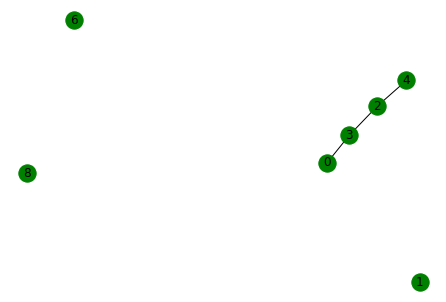

In [5]:
d,gsuper = editDistance(G1,G2)
print("The edit distance of the 2 graphs is: ",d)
nx.draw(gsuper, with_labels=True,node_color='g')

In [6]:
print('Edit distance with networkx is:',nx.graph_edit_distance(G1, G2))

Edit distance with networkx is: 3.0


In [ ]:
#example 2
G3,G4 = nx.Graph(),nx.Graph()
 
G3.add_edges_from([(0, 2),(2, 3),(3, 4),(1, 4),(1, 5)])
G4.add_edges_from([(1, 5),(5, 6),(5, 7),(4, 8),(3, 8)])
d_,gsuper_ = editDistance(G3,G4)
print("The edit distance of the 2 graphs is: ",d_)
nx.draw(gsuper, with_labels=True,node_color='g')
print('Edit distance with networkx is:',nx.graph_edit_distance(G3, G4))

## Comment:
Following a comparison with the results with the edit_distance function of networkx, we notice that the results obtained with our function are incorrect. We think that this is due to our misunderstanding of the algorithm and the fact of not having taken into account the substitutions. We did not do it, because we did not understand well this notion, we do not know how to substitute a node (with respect to its label or color or weight)
